In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [23]:
DIR = "../build/results/"

In [24]:
list_doping_files = glob.glob(DIR + "doping*.csv")
print(f"Nb of files: {len(list_doping_files)}")

Nb of files: 193


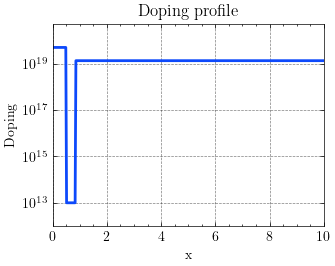

In [25]:
# Annimate the doping profile
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("Doping")
ax.set_title("Doping profile")
ax.set_yscale('log')
ax.set_ylim(1e12, 5e20)
ax.set_xlim(0, 10)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x_position,donor_concentration,acceptor_concentration,total_doping = np.loadtxt(list_doping_files[i], delimiter=',', unpack=True, skiprows=1)
    total_doping = np.abs(total_doping)
    line.set_data(x_position, total_doping)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(list_doping_files), interval=20, blit=True)
anim.save('../build/doping_profile_optim.mp4', fps=10, extra_args=['-vcodec', 'libx264'], dpi=300)

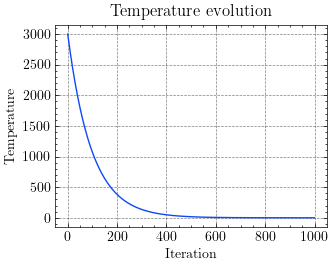

In [30]:
Niter = 1000
temp_init = 3000
temp_final = 1.0e-1
alpha_decay_exp = 0.99
temperture = temp_init
list_temp = []
for i in range(Niter):
    temperture = temp_init * (temp_final/temp_init)**(i/Niter)
    list_temp.append(temperture)

fig, ax = plt.subplots()
ax.set_xlabel("Iteration")
ax.set_ylabel("Temperature")
ax.set_title("Temperature evolution")
# ax.set_yscale('log')
ax.plot(list_temp)